In [1]:
import sqlite3
from pandas import read_csv, read_sql, set_option
import pathlib
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("dbs/test_db.sqlite")

In [3]:
path = pathlib.Path(pathlib.os.getcwd()).parent/"datasets/house_prices/train.csv"

In [4]:
df = read_csv(path)

In [5]:
try:
    df.to_sql("test_db", conn)
except:
    print("db is exists")

db is exists


In [6]:
# Head

"""
def make_query(query):
    read_sql(query, test_db)
"""

query = """select * from test_db limit 5"""

read_sql(query, conn)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [7]:
# Get test db information like .info()
read_sql("""pragma table_info(test_db)""",
        conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Id,INTEGER,0,None,0
2,2,MSSubClass,INTEGER,0,None,0
3,3,MSZoning,TEXT,0,None,0
4,4,LotFrontage,REAL,0,None,0
...,...,...,...,...,...,...
77,77,MoSold,INTEGER,0,None,0
78,78,YrSold,INTEGER,0,None,0
79,79,SaleType,TEXT,0,None,0
80,80,SaleCondition,TEXT,0,None,0


In [8]:
table_info = read_sql("""pragma table_info(test_db)""",conn)

In [9]:
table_info[table_info["notnull"]!=0]

,cid,name,type,notnull,dflt_value,pk


In [10]:
table_info["notnull"].value_counts()

0    82
Name: notnull, dtype: int64

In [11]:
# Tables
read_sql("""SELECT name FROM sqlite_schema
where name='test_db'""", conn)

,name
0,test_db


In [12]:
# read_sql("""drop table test_db""",conn)

# read_sql("alter table drop column index", conn)

In [13]:
# Get null values

for key, val in zip(df.isnull().sum().keys(),df.isnull().sum().values):
    if val>=1:
        print(key, val)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


It is hard to get all null values and dropping column in sqlite3 so we implement these actions on pandas.

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [16]:
for col in df.columns:
    print(col,"--->",len(df[col].value_counts()))

Id ---> 1460
MSSubClass ---> 15
MSZoning ---> 5
LotFrontage ---> 110
LotArea ---> 1073
Street ---> 2
Alley ---> 2
LotShape ---> 4
LandContour ---> 4
Utilities ---> 2
LotConfig ---> 5
LandSlope ---> 3
Neighborhood ---> 25
Condition1 ---> 9
Condition2 ---> 8
BldgType ---> 5
HouseStyle ---> 8
OverallQual ---> 10
OverallCond ---> 9
YearBuilt ---> 112
YearRemodAdd ---> 61
RoofStyle ---> 6
RoofMatl ---> 8
Exterior1st ---> 15
Exterior2nd ---> 16
MasVnrType ---> 4
MasVnrArea ---> 327
ExterQual ---> 4
ExterCond ---> 5
Foundation ---> 6
BsmtQual ---> 4
BsmtCond ---> 4
BsmtExposure ---> 4
BsmtFinType1 ---> 6
BsmtFinSF1 ---> 637
BsmtFinType2 ---> 6
BsmtFinSF2 ---> 144
BsmtUnfSF ---> 780
TotalBsmtSF ---> 721
Heating ---> 6
HeatingQC ---> 5
CentralAir ---> 2
Electrical ---> 5
1stFlrSF ---> 753
2ndFlrSF ---> 417
LowQualFinSF ---> 24
GrLivArea ---> 861
BsmtFullBath ---> 4
BsmtHalfBath ---> 3
FullBath ---> 4
HalfBath ---> 3
BedroomAbvGr ---> 8
KitchenAbvGr ---> 4
KitchenQual ---> 4
TotRmsAbvGrd ---> 12

LOOK TO DATA

In [17]:
# To see all columns together on pandas dataframe

# set_option('display.max_columns', None)

In [18]:
# Look at table to understand data more
# There is no way to choose columns by id e.g select column with id 3

read_sql("select * from test_db limit 15", conn)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,...,0,None,None,None,0,1,2008,WD,Normal,118000


Note "Alley, PoolQC, Fence, MiscFeature" they have NaN values

In [19]:
print(read_sql("select distinct Alley from test_db", conn),"\n")
print(read_sql("select distinct PoolQC from test_db", conn),"\n")
print(read_sql("select distinct Fence from test_db", conn),"\n")
print(read_sql("select distinct MiscFeature from test_db", conn))

  Alley
0  None
1  Grvl
2  Pave 

  PoolQC
0   None
1     Ex
2     Fa
3     Gd 

   Fence
0   None
1  MnPrv
2   GdWo
3  GdPrv
4   MnWw 

  MiscFeature
0        None
1        Shed
2        Gar2
3        Othr
4        TenC


In [20]:
# Depending on year we compare
# and we can see the highest price is in 2007

read_sql("""select Id,YrSold,sum(MSSubClass),avg(MSSubClass),
sum(SalePrice), round(avg(SalePrice)) from test_db
group by YrSold""", conn)

,Id,YrSold,sum(MSSubClass),avg(MSSubClass),sum(SalePrice),round(avg(SalePrice))
0,4,2006,18805,59.888535,57320530,182549.0
1,2,2007,17870,54.316109,61214777,186063.0
2,1,2008,17945,59.029605,53917695,177361.0
3,6,2009,18480,54.674556,60648051,179432.0
4,17,2010,9970,56.971429,31043893,177394.0


In [21]:
# Depending on month we compare

read_sql("""select Id,MoSold,sum(MSSubClass),avg(MSSubClass),
sum(SalePrice), round(avg(SalePrice)) from test_db
group by MoSold""", conn)

,Id,MoSold,sum(MSSubClass),avg(MSSubClass),sum(SalePrice),round(avg(SalePrice))
0,10,1,3265,56.293103,10628863,183256.0
1,1,2,2490,47.884615,9249864,177882.0
2,17,3,6320,59.622642,19424916,183254.0
3,9,4,8455,59.964539,24181960,171503.0
4,2,5,11950,58.578431,35150683,172307.0
5,19,6,14710,58.142292,44881121,177396.0
6,12,7,12505,53.440171,43601499,186331.0
7,7,8,7475,61.270492,22527523,184652.0
8,3,9,3340,53.015873,12328042,195683.0
9,6,10,4920,55.280899,15981194,179564.0


In [22]:
# We look MSZoning 

read_sql("""select MSZoning, count(MSZoning),
max(LotArea) maxLotArea,
max(SalePrice) maxSalePrice,
round(avg(SalePrice)) avgSalePrice
from test_db
group by MSZoning

""", conn)

,MSZoning,count(MSZoning),maxLotArea,maxSalePrice,avgSalePrice
0,C (all),10,18000,133900,74528.0
1,FV,65,12552,370878,214014.0
2,RH,16,12155,200000,131558.0
3,RL,1151,215245,755000,191005.0
4,RM,218,22950,475000,126317.0


In [23]:
print(f"""{read_sql("select count(*) from pragma_table_info('test_db')", conn)},\
\n\n{read_sql("select count(*) from test_db", conn)}""")

   count(*)
0        82,

   count(*)
0      1460


In [24]:
row_no = read_sql("select count(*) from test_db", conn)
col_no = read_sql("select count(*) from pragma_table_info('test_db')", conn)

In [25]:
print(f"Column number: {col_no.values[0][0]}, \
Row number: {row_no.values[0][0]}")

Column number: 82, Row number: 1460


In [26]:
read_sql("select Street, count(*) StreetCount from test_db \
group by Street", conn)

,Street,StreetCount
0,Grvl,6
1,Pave,1454


In [27]:
# We are looking for pool quality
# The sale price doesnt have a direct relation with poolqc
# because fair level pool quality homes have greater sale prices.

read_sql("select PoolQC, AVG(SalePrice) from test_db \
group by PoolQC \
having PoolQC!='None' \
order by AVG(SalePrice) desc", conn)

,PoolQC,AVG(SalePrice)
0,Ex,490000.0
1,Fa,215500.0
2,Gd,201990.0


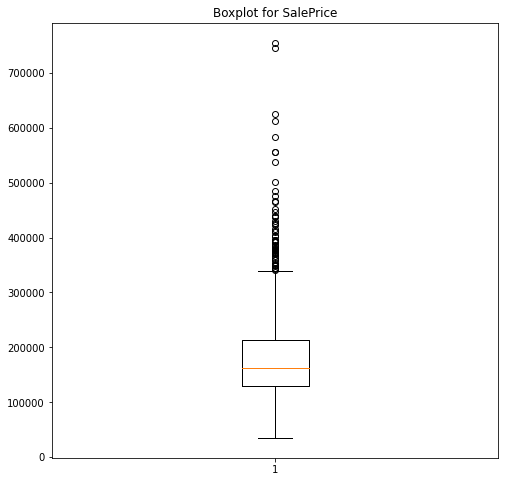

In [28]:
plt.figure(figsize=(8,8))
plt.boxplot(df["SalePrice"])
plt.title("Boxplot for SalePrice")
plt.show()

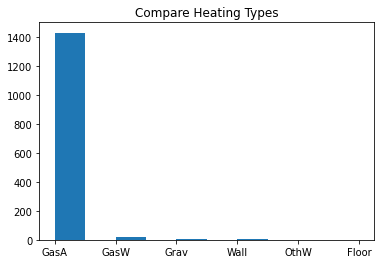

In [29]:
plt.hist(df["Heating"])
plt.title("Compare Heating Types")
plt.show()

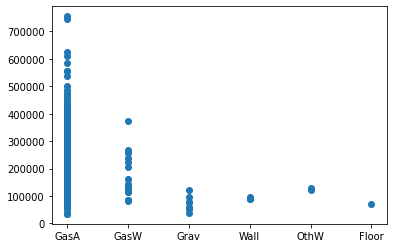

In [30]:
plt.scatter(df["Heating"],
           df["SalePrice"])

In [31]:
read_sql("select CentralAir,count(*) CACount from test_db \
group by CentralAir", conn)

,CentralAir,CACount
0,N,95
1,Y,1365


In [32]:
# Depending on boxplot above we get the homes those sale prices 
# less than 300.000 roughly

In [33]:
lt_300 = read_sql("select * from test_db \
where SalePrice<300000", conn)

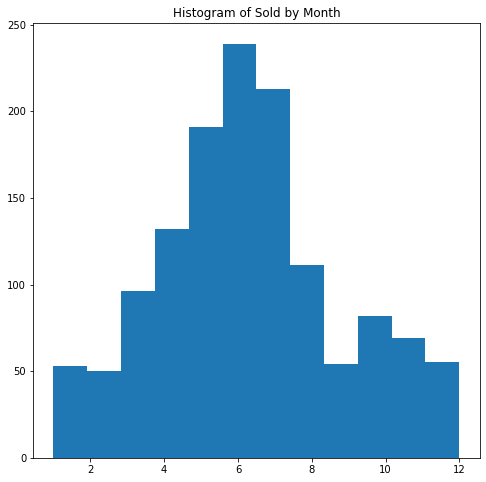

In [34]:
plt.figure(figsize=(8,8))
plt.hist(lt_300["MoSold"], bins=12)
plt.title("Histogram of Sold by Month")
plt.show()

First add season column after drop it but we add a season column and depend on months we fill it and we will make an analysis how sales change depending on seasons.

In [35]:
try:
    with sqlite3.connect("dbs/test_db.sqlite") as conn2:
        conn2.cursor()
        conn2.execute("alter table test_db add column season varchar")
        conn2.close()
except:
    pass

In [36]:
read_sql("select * from test_db", conn)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,season
0,0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,...,None,None,None,0,2,2008,WD,Normal,208500,None
1,1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,...,None,None,None,0,5,2007,WD,Normal,181500,None
2,2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,...,None,None,None,0,9,2008,WD,Normal,223500,None
3,3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,...,None,None,None,0,2,2006,WD,Abnorml,140000,None
4,4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,...,None,None,None,0,12,2008,WD,Normal,250000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,...,None,None,None,0,8,2007,WD,Normal,175000,None
1456,1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,...,None,MnPrv,None,0,2,2010,WD,Normal,210000,None
1457,1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,...,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500,None
1458,1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,...,None,None,None,0,4,2010,WD,Normal,142125,None


In [37]:
try:
    with sqlite3.connect("dbs/test_db.sqlite") as conn2:
            conn2.cursor()
            conn2.execute("alter table test_db drop column season")
            conn2.close()
except:
    pass

In [38]:
read_sql("select * from test_db", conn)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [39]:
df_extended = read_sql("select *, case \
when MoSold between 12 and 2 then 'Winter' \
when MoSold between 3 and 5 then 'Spring' \
when MoSold between 6 and 8 then 'Summer' \
else 'Autumn' end Season \
from test_db",conn)

In [40]:
df_extended.drop(["index", "Id"],axis=1, inplace=True)

In [41]:
#read_sql("""drop table test_db2 if exists(select name from 
#sqlite_schema where name='test_db2')""", conn)

try:
    read_sql("drop table test_db2", conn)
except:
    pass

In [42]:
df_extended.to_sql("test_db2", conn)

In [43]:
data = read_sql("select SalePrice, Season, count(*) SeasonCount \
from test_db2 group by Season", conn) 

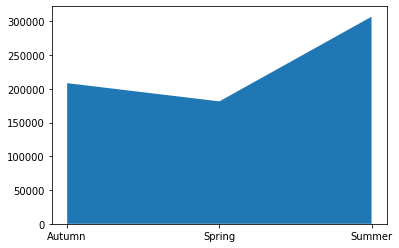

In [44]:
plt.stackplot(data["Season"], data["SalePrice"])
plt.show()

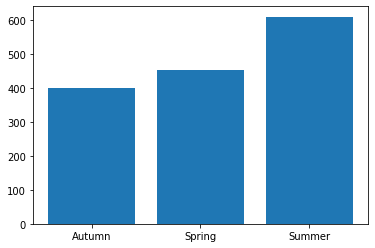

In [45]:
plt.bar(data["Season"], data["SeasonCount"])
plt.show()

As we see on above graphs top sales in summer. And the saleprice is highest on summer so if you want to buy a home dont wait to Summer :))